3가지 데이터 시각화 : 서클 패킹 다이어그램, 바 차트(barplot), 도트 플롯맵
서클 패킹 다이어그램 --> D3.js 
바 차트 + 도트 플롯맵 --> seaborn


은퇴한 유명 농구선수 코비 슛 데이터 총 30697개 분석하여 예측하는 맞추는 대회
(80%데이터만 성공 실패 데이터 존재, 20% 나머지 예측)

In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df=pd.read_csv('data/kobe_data.csv')

In [3]:
#df.loc[:2,-3:-1]
df.head(2)
df.tail(2)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696
30696,Jump Shot,Jump Shot,471,49900088,33.9723,1,72,-118.2688,0,4,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30697


In [4]:
#df.info()
len(df)
#df.columns

30697

필요없는 데이터 제거

In [5]:
#빼는것을 하나 추가
#df

df.drop(['game_event_id', 'game_id', 'lat','lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining'],axis=1,inplace=True)
df.drop(['team_id', 'team_name', 'game_date', 'matchup', 'opponent'], axis=1, inplace=True)


In [6]:
df.drop(['shot_distance','shot_type','shot_zone_range','shot_id'], axis=1, inplace=True)

In [7]:
df.head(3)
df.tail(3)

,action_type,combined_shot_type,loc_x,loc_y,shot_made_flag,shot_zone_area,shot_zone_basic
0,Jump Shot,Jump Shot,167,72,NaN,Right Side(R),Mid-Range
1,Jump Shot,Jump Shot,-157,0,0.0,Left Side(L),Mid-Range
2,Jump Shot,Jump Shot,-101,135,1.0,Left Side Center(LC),Mid-Range


,action_type,combined_shot_type,loc_x,loc_y,shot_made_flag,shot_zone_area,shot_zone_basic
30694,Running Jump Shot,Jump Shot,-134,166,1.0,Left Side Center(LC),Mid-Range
30695,Jump Shot,Jump Shot,31,267,0.0,Center(C),Above the Break 3
30696,Jump Shot,Jump Shot,1,72,0.0,Center(C),In The Paint (Non-RA)


슛팅의 종류가 어떻게 나뉘는지 시각화로 쉽게 알아보자 by D3.js (서클 패킹 다이어그램)

빅데이터 전처리 (약간 복잡함 / 진행하다 중간 생략할 듯)

In [8]:
shot_type_df = df.dropna()
len(df)
len(shot_type_df)

30697

25697

In [9]:
shot_type_df = shot_type_df[['action_type','combined_shot_type']]
shot_type_df.head(2)
shot_type_df.tail(2)

,action_type,combined_shot_type
1,Jump Shot,Jump Shot
2,Jump Shot,Jump Shot


,action_type,combined_shot_type
30695,Jump Shot,Jump Shot
30696,Jump Shot,Jump Shot


In [10]:
shot_group =shot_type_df.groupby(['combined_shot_type','action_type'])
type(shot_type_df)
type(shot_group)
type(shot_group.size())
shot_group = shot_group.size()
#shot_group.index

pandas.core.frame.DataFrame

pandas.core.groupby.DataFrameGroupBy

pandas.core.series.Series

In [11]:
shot_group.index.get_level_values(0)
level0 = shot_group.index.get_level_values(0).tolist()
level1 = shot_group.index.get_level_values(1).tolist()
#shot_group.index.get_level_values('combined_shot_type')
#shot_group['Dunk'].index
#shot_group.size().index


Index(['Bank Shot', 'Bank Shot', 'Bank Shot', 'Bank Shot', 'Bank Shot', 'Dunk',
       'Dunk', 'Dunk', 'Dunk', 'Dunk', 'Dunk', 'Dunk', 'Dunk', 'Dunk', 'Dunk',
       'Dunk', 'Dunk', 'Hook Shot', 'Hook Shot', 'Hook Shot', 'Hook Shot',
       'Jump Shot', 'Jump Shot', 'Jump Shot', 'Jump Shot', 'Jump Shot',
       'Jump Shot', 'Jump Shot', 'Jump Shot', 'Jump Shot', 'Jump Shot',
       'Jump Shot', 'Jump Shot', 'Jump Shot', 'Jump Shot', 'Jump Shot',
       'Layup', 'Layup', 'Layup', 'Layup', 'Layup', 'Layup', 'Layup', 'Layup',
       'Layup', 'Layup', 'Layup', 'Layup', 'Layup', 'Layup', 'Layup', 'Layup',
       'Layup', 'Tip Shot', 'Tip Shot'],
      dtype='object', name='combined_shot_type')

In [12]:
shot_group_dict = shot_group.to_dict()
base_index = ['Bank Shot', 'Dunk', 'Hook Shot', 'Jump Shot', 'Layup', 'Tip Shot']

shot_group_dict_adv ={}
for index in base_index:
    shot_group_dict_adv[index] = {}
for index in shot_group_dict :
    shot_group_dict_adv[index[0]][index[1]] = shot_group[index]
#    print (index)
#shot_group_dict_adv
#shot_group_dict

In [13]:
import json

kobe_dic = {}
kobe_dic["name"]= "shot_selection"
kobe_dic["children"] = []

#for index in shot_group_dict_adv:
#    temp_dic = {"name":index,"children" : []}
#    kobe_dic["children"].append(temp_dic)
for index_0 in shot_group_dict_adv:
    temp_dic = {"name":index_0,"children" : []}
 #   kobe_dic["children"].append(temp_dic)
 #   kobe_dic["children"].append()
    for index_1 in shot_group_dict_adv[index_0]:
        temp_dic_2 = {"name":index_1,"size" : \
                      str(shot_group_dict_adv[index_0][index_1])}
        temp_dic['children'].append(temp_dic_2)
    kobe_dic["children"].append(temp_dic)    
#kobe_dic        
kobe_json_temp = json.dumps(kobe_dic)


with open('kobe_temp.json', 'w') as outfile:  
    json.dump(kobe_dic, outfile)
pd.read_json('kobe_temp.json').head()
#kobe_json

,children,name
0,"{'name': 'Bank Shot', 'children': [{'name': 'D...",shot_selection
1,"{'name': 'Dunk', 'children': [{'name': 'Alley ...",shot_selection
2,"{'name': 'Hook Shot', 'children': [{'name': 'D...",shot_selection
3,"{'name': 'Jump Shot', 'children': [{'name': 'D...",shot_selection
4,"{'name': 'Layup', 'children': [{'name': 'Alley...",shot_selection


html css javascript 를 통해 D3.js 데이터 시각화 진행

In [14]:
html_string = """
<!DOCTYPE html>
<meta charset="utf-8">
<style>

.node {
  cursor: pointer;
}

.node:hover {
  stroke: #000;
  stroke-width: 1.5px;
}

.node--leaf {
  fill: white;
}

.label {
  font: 11px "Helvetica Neue", Helvetica, Arial, sans-serif;
  text-anchor: middle;
  text-shadow: 0 1px 0 #fff, 1px 0 0 #fff, -1px 0 0 #fff, 0 -1px 0 #fff;
}

.label,
.node--root,
.node--leaf {
  pointer-events: none;
}

</style>
<svg width="380" height="380"></svg>
"""

In [15]:
js_string="""
 require.config({
    paths: {
        d3: "https://d3js.org/d3.v4.min"
     }
 });

  require(["d3"], function(d3) {

   console.log(d3);

var svg = d3.select("svg"),
    margin = 20,
    diameter = +svg.attr("width"),
    g = svg.append("g").attr("transform", "translate(" + diameter / 2 + "," + diameter / 2 + ")");

var color = d3.scaleSequential(d3.interpolateViridis)
    .domain([-4, 4]);

var pack = d3.pack()
    .size([diameter - margin, diameter - margin])
    .padding(2);

d3.json("kobe_temp.json", function(error, root) {
  if (error) throw error;

  root = d3.hierarchy(root)
      .sum(function(d) { return d.size; })
      .sort(function(a, b) { return b.value - a.value; });

  var focus = root,
      nodes = pack(root).descendants(),
      view;

  var circle = g.selectAll("circle")
    .data(nodes)
    .enter().append("circle")
      .attr("class", function(d) { return d.parent ? d.children ? "node" : "node node--leaf" : "node node--root"; })
      .style("fill", function(d) { return d.children ? color(d.depth) : null; })
      .on("click", function(d) { if (focus !== d) zoom(d), d3.event.stopPropagation(); });

  var text = g.selectAll("text")
    .data(nodes)
    .enter().append("text")
      .attr("class", "label")
      .style("fill-opacity", function(d) { return d.parent === root ? 1 : 0; })
      .style("display", function(d) { return d.parent === root ? "inline" : "none"; })
      .text(function(d) { return d.data.name; });

  var node = g.selectAll("circle,text");

  svg
      .style("background", color(-1))
      .on("click", function() { zoom(root); });

  zoomTo([root.x, root.y, root.r * 2 + margin]);

  function zoom(d) {
    var focus0 = focus; focus = d;

    var transition = d3.transition()
        .duration(d3.event.altKey ? 7500 : 750)
        .tween("zoom", function(d) {
          var i = d3.interpolateZoom(view, [focus.x, focus.y, focus.r * 2 + margin]);
          return function(t) { zoomTo(i(t)); };
        });

    transition.selectAll("text")
      .filter(function(d) { return d.parent === focus || this.style.display === "inline"; })
        .style("fill-opacity", function(d) { return d.parent === focus ? 1 : 0; })
        .on("start", function(d) { if (d.parent === focus) this.style.display = "inline"; })
        .on("end", function(d) { if (d.parent !== focus) this.style.display = "none"; });
  }

  function zoomTo(v) {
    var k = diameter / v[2]; view = v;
    node.attr("transform", function(d) { return "translate(" + (d.x - v[0]) * k + "," + (d.y - v[1]) * k + ")"; });
    circle.attr("r", function(d) { return d.r * k; });
  }
});
  });
 """

In [16]:
import IPython.display
from IPython.core.display import display, HTML, Javascript
h = display(HTML(html_string))
j = IPython.display.Javascript(js_string)
IPython.display.display_javascript(j)

어떤 슛팅이 성공률이 높은지 시각화로 쉽게 알아보자 by seaborn (바 차트)

In [17]:
shoot_percentage = df.dropna()[['combined_shot_type','shot_made_flag']].groupby(['combined_shot_type']).mean().sort_values(by='shot_made_flag',ascending=1)

In [18]:
shoot_percentage
shoot_percentage.index
shoot_percentage.columns

,shot_made_flag
combined_shot_type,
Tip Shot,0.348684
Jump Shot,0.391071
Hook Shot,0.535433
Layup,0.565093
Bank Shot,0.791667
Dunk,0.928030


Index(['Tip Shot', 'Jump Shot', 'Hook Shot', 'Layup', 'Bank Shot', 'Dunk'], dtype='object', name='combined_shot_type')

Index(['shot_made_flag'], dtype='object')

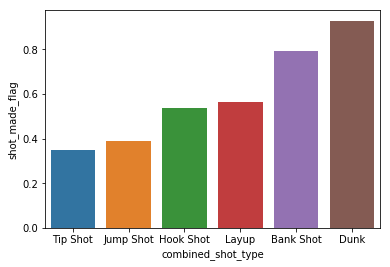

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=shoot_percentage.index,y=shoot_percentage.shot_made_flag)
#plt.xticks(rotation=45)
plt.show()

골대에서 멀어질 수록 정말 골을 넣기 어려운지 알아보자 by seaborn (도트 플롯 맵)

In [21]:
df.head(2)
df.tail(2)

,action_type,combined_shot_type,loc_x,loc_y,shot_made_flag,shot_zone_area,shot_zone_basic
0,Jump Shot,Jump Shot,167,72,NaN,Right Side(R),Mid-Range
1,Jump Shot,Jump Shot,-157,0,0.0,Left Side(L),Mid-Range


,action_type,combined_shot_type,loc_x,loc_y,shot_made_flag,shot_zone_area,shot_zone_basic
30695,Jump Shot,Jump Shot,31,267,0.0,Center(C),Above the Break 3
30696,Jump Shot,Jump Shot,1,72,0.0,Center(C),In The Paint (Non-RA)


In [22]:
df['shot_zone_combined'] = df[['shot_zone_area','shot_zone_basic']].apply(lambda x: ' '.join(x), axis=1)
df.head(2)
df.tail(2)

,action_type,combined_shot_type,loc_x,loc_y,shot_made_flag,shot_zone_area,shot_zone_basic,shot_zone_combined
0,Jump Shot,Jump Shot,167,72,NaN,Right Side(R),Mid-Range,Right Side(R) Mid-Range
1,Jump Shot,Jump Shot,-157,0,0.0,Left Side(L),Mid-Range,Left Side(L) Mid-Range


,action_type,combined_shot_type,loc_x,loc_y,shot_made_flag,shot_zone_area,shot_zone_basic,shot_zone_combined
30695,Jump Shot,Jump Shot,31,267,0.0,Center(C),Above the Break 3,Center(C) Above the Break 3
30696,Jump Shot,Jump Shot,1,72,0.0,Center(C),In The Paint (Non-RA),Center(C) In The Paint (Non-RA)


In [23]:
shot_zone_map = df.groupby(['shot_zone_combined']).mean()['shot_made_flag']
shot_zone_map

shot_zone_combined
Back Court(BC) Above the Break 3           0.000000
Back Court(BC) Backcourt                   0.016667
Center(C) Above the Break 3                0.320734
Center(C) In The Paint (Non-RA)            0.455065
Center(C) Mid-Range                        0.418877
Center(C) Restricted Area                  0.618004
Left Side Center(LC) Above the Break 3     0.319277
Left Side Center(LC) Mid-Range             0.410923
Left Side(L) In The Paint (Non-RA)         0.412698
Left Side(L) Left Corner 3                 0.370833
Left Side(L) Mid-Range                     0.397361
Right Side Center(RC) Above the Break 3    0.344581
Right Side Center(RC) Mid-Range            0.419259
Right Side(R) In The Paint (Non-RA)        0.480769
Right Side(R) Mid-Range                    0.397749
Right Side(R) Right Corner 3               0.339339
Name: shot_made_flag, dtype: float64

In [24]:
df['avg_by_shot_zone_combined'] = df['shot_zone_combined'].map(shot_zone_map)
df.head(2)
df.tail(2)
df = df[df['loc_y']>=0]

,action_type,combined_shot_type,loc_x,loc_y,shot_made_flag,shot_zone_area,shot_zone_basic,shot_zone_combined,avg_by_shot_zone_combined
0,Jump Shot,Jump Shot,167,72,NaN,Right Side(R),Mid-Range,Right Side(R) Mid-Range,0.397749
1,Jump Shot,Jump Shot,-157,0,0.0,Left Side(L),Mid-Range,Left Side(L) Mid-Range,0.397361


,action_type,combined_shot_type,loc_x,loc_y,shot_made_flag,shot_zone_area,shot_zone_basic,shot_zone_combined,avg_by_shot_zone_combined
30695,Jump Shot,Jump Shot,31,267,0.0,Center(C),Above the Break 3,Center(C) Above the Break 3,0.320734
30696,Jump Shot,Jump Shot,1,72,0.0,Center(C),In The Paint (Non-RA),Center(C) In The Paint (Non-RA),0.455065


In [25]:
fig = plt.figure(figsize=(10,8))
plt.scatter(df['loc_x'],df['loc_y'],c=df['avg_by_shot_zone_combined'],s=50, cmap='viridis')
plt.xlim(280,-280)
plt.ylim(-10,450)
plt.colorbar()
plt.title('Kobe Bryant\'s shot accuracy by Shot Zone')


(280, -280)

(-10, 450)

Text(0.5,1,"Kobe Bryant's shot accuracy by Shot Zone")

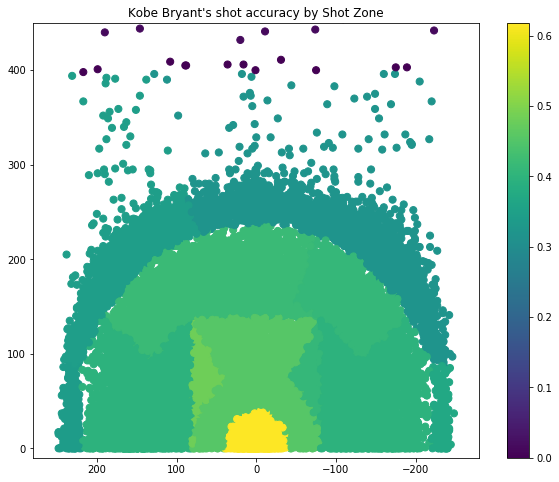

In [26]:
plt.show()
#plt.savefig('Kobe Bryants shot accuracy by zone.png')